<a href="https://colab.research.google.com/github/Gaurav-phatkare/arXiv-Paper-Abstracts-Mutli-Label-Classification-Using-Deep-Learning/blob/main/Multilabel_Text_Classification_of_Research_Papers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Aug  4 16:58:59 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d spsayakpaul/arxiv-paper-abstracts

 90% 40.0M/44.6M [00:00<00:00, 138MB/s]
100% 44.6M/44.6M [00:00<00:00, 133MB/s]


In [8]:
!unzip /content/arxiv-paper-abstracts.zip

Archive:  /content/arxiv-paper-abstracts.zip
  inflating: arxiv_data.csv          
  inflating: arxiv_data_210930-054931.csv  


In [9]:
df = pd.read_csv("/content/arxiv_data.csv")

In [10]:
df.shape

(51774, 3)

In [11]:
df.head()

,titles,summaries,terms
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']"
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']"
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']"
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV']
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']"


In [12]:
df.iloc[4].summaries,df.iloc[4].terms

('To ensure safety in automated driving, the correct perception of the\nsituation inside the car is as important as its environment. Thus, seat\noccupancy detection and classification of detected instances play an important\nrole in interior sensing. By the knowledge of the seat occupancy status, it is\npossible to, e.g., automate the airbag deployment control. Furthermore, the\npresence of a driver, which is necessary for partially automated driving cars\nat the automation levels two to four can be verified. In this work, we compare\ndifferent statistical methods from the field of image segmentation to approach\nthe problem of background-foreground segmentation in camera based interior\nsensing. In the recent years, several methods based on different techniques\nhave been developed and applied to images or videos from different\napplications. The peculiarity of the given scenarios of interior sensing is,\nthat the foreground instances and the background both contain static as well as\

In [13]:
df['titles'].duplicated().sum()

12802

In [14]:
df.drop_duplicates(inplace = True)

In [15]:
df.shape

(38991, 3)

In [16]:
import re
def Text_cleaning(text):
  text = re.sub(r"\n" , " ", text)

  text = re.sub(r"\s+" , " ", text)

  text = text.lower()
  text = text.replace('\n'," ")

  return text



In [17]:
Text_cleaning(df.iloc[4].summaries)

'to ensure safety in automated driving, the correct perception of the situation inside the car is as important as its environment. thus, seat occupancy detection and classification of detected instances play an important role in interior sensing. by the knowledge of the seat occupancy status, it is possible to, e.g., automate the airbag deployment control. furthermore, the presence of a driver, which is necessary for partially automated driving cars at the automation levels two to four can be verified. in this work, we compare different statistical methods from the field of image segmentation to approach the problem of background-foreground segmentation in camera based interior sensing. in the recent years, several methods based on different techniques have been developed and applied to images or videos from different applications. the peculiarity of the given scenarios of interior sensing is, that the foreground instances and the background both contain static as well as dynamic eleme

In [18]:
df['cleaned_summary'] = df['summaries'].apply(Text_cleaning)

In [19]:
df.head()

,titles,summaries,terms,cleaned_summary
0,Survey on Semantic Stereo Matching / Semantic ...,Stereo matching is one of the widely used tech...,"['cs.CV', 'cs.LG']",stereo matching is one of the widely used tech...
1,FUTURE-AI: Guiding Principles and Consensus Re...,The recent advancements in artificial intellig...,"['cs.CV', 'cs.AI', 'cs.LG']",the recent advancements in artificial intellig...
2,Enforcing Mutual Consistency of Hard Regions f...,"In this paper, we proposed a novel mutual cons...","['cs.CV', 'cs.AI']","in this paper, we proposed a novel mutual cons..."
3,Parameter Decoupling Strategy for Semi-supervi...,Consistency training has proven to be an advan...,['cs.CV'],consistency training has proven to be an advan...
4,Background-Foreground Segmentation for Interio...,"To ensure safety in automated driving, the cor...","['cs.CV', 'cs.LG']","to ensure safety in automated driving, the cor..."


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38991 entries, 0 to 51772
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   titles           38991 non-null  object
 1   summaries        38991 non-null  object
 2   terms            38991 non-null  object
 3   cleaned_summary  38991 non-null  object
dtypes: object(4)
memory usage: 1.5+ MB


In [21]:
df.terms.value_counts()

['cs.CV']                                          12753
['cs.LG', 'stat.ML']                                4076
['cs.LG']                                           2047
['cs.CV', 'cs.LG']                                  1488
['cs.LG', 'cs.AI']                                  1207
                                                   ...  
['cs.LG', 'cs.CL', 'cs.HC', 'stat.ML']                 1
['cs.LG', 'cs.AI', 'cs.CL', 'cs.PL', 'stat.ML']        1
['cs.LG', 'cs.CL', 'stat.ME', 'stat.ML']               1
['cs.LG', 'cs.CL', 'cs.LO', 'stat.ML']                 1
['stat.ML', 'cs.CV', 'cs.LG', 'q-bio.QM']              1
Name: terms, Length: 3157, dtype: int64

In [22]:
new_df = df.groupby('terms').filter(lambda x: len(x) > 1)

In [23]:
new_df.terms.value_counts()

['cs.CV']                                                         12753
['cs.LG', 'stat.ML']                                               4076
['cs.LG']                                                          2047
['cs.CV', 'cs.LG']                                                 1488
['cs.LG', 'cs.AI']                                                 1207
                                                                  ...  
['cs.CV', 'cs.LG', 'eess.IV', 'eess.SP', 'stat.ML']                   2
['cs.LG', 'cs.CL', 'cs.CV', 'cs.NE', 'stat.ML']                       2
['stat.ML', 'cs.IT', 'cs.LG', 'math.IT', 'math.ST', 'stat.TH']        2
['cs.CV', 'cs.CL', 'cs.LG', 'eess.AS', 'eess.IV']                     2
['cs.LG', 'G.3']                                                      2
Name: terms, Length: 836, dtype: int64

In [24]:
len(new_df.iloc[2].terms),new_df.iloc[2].terms

(18, "['cs.CV', 'cs.AI']")

## convert the string labels to lists of strings

In [25]:
import ast
new_df['terms'] = new_df['terms'].apply(lambda x: ast.literal_eval(x))

In [26]:
len(new_df.iloc[2].terms),new_df.iloc[2].terms

(2, ['cs.CV', 'cs.AI'])

In [27]:
new_df['terms'].values[:5]

array([list(['cs.CV', 'cs.LG']), list(['cs.CV', 'cs.AI', 'cs.LG']),
       list(['cs.CV', 'cs.AI']), list(['cs.CV']),
       list(['cs.CV', 'cs.LG'])], dtype=object)

## Spliting into train test split

In [28]:
from sklearn.model_selection import train_test_split
# train_df, test_df_0 = train_test_split(
#     new_df,
#     test_size = 0.1,
#     stratify = new_df['terms'].values
# )

In [29]:
# train_df.shape, test_df_0.shape

In [30]:
# # spliting test data further into test and validation

# test_df, val_df = train_test_split(
#     test_df_0,
#     train_size = 0.5,
#     stratify = new_df['terms'].values
# )

In [31]:
from sklearn.model_selection import train_test_split

def split_dataset(data, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1, random_seed=42):

    train_data, temp_data = train_test_split(data, train_size=train_ratio, random_state=random_seed)
    test_data, val_data = train_test_split(temp_data, train_size=test_ratio / (test_ratio + val_ratio),
                                           random_state=random_seed)

    return train_data, test_data, val_data


train_data, test_data, val_data = split_dataset(new_df, train_ratio=0.8, test_ratio=0.1, val_ratio=0.1)


In [32]:
len(train_data),len(test_data),len(val_data)

(29336, 3667, 3667)

### Multi-label Binarization

In [33]:
tf.keras.layers.StringLookup(output_mode = 'multi_hot')

In [34]:
terms = tf.ragged.constant(train_data['terms'].values)
lookup = tf.keras.layers.StringLookup(output_mode = 'multi_hot')
lookup.adapt(terms)
vocab = lookup.get_vocabulary()

In [35]:
vocab

['[UNK]',
 'cs.CV',
 'cs.LG',
 'stat.ML',
 'cs.AI',
 'eess.IV',
 'cs.RO',
 'cs.CL',
 'cs.NE',
 'cs.CR',
 'math.OC',
 'eess.SP',
 'cs.GR',
 'cs.SI',
 'cs.MM',
 'cs.SY',
 'cs.IR',
 'eess.SY',
 'cs.MA',
 'cs.HC',
 'cs.DC',
 'math.IT',
 'cs.IT',
 'cs.CY',
 'stat.AP',
 'stat.TH',
 'math.ST',
 'stat.ME',
 'eess.AS',
 'cs.SD',
 'q-bio.QM',
 'cs.DS',
 'q-bio.NC',
 'cs.NI',
 'cs.SE',
 'I.2.6',
 'stat.CO',
 'cs.CG',
 'cs.GT',
 'math.NA',
 'physics.chem-ph',
 'cs.NA',
 'cs.DB',
 'cs.LO',
 'cs.PL',
 '68T45',
 'q-bio.BM',
 'physics.comp-ph',
 'math.PR',
 'cs.AR',
 'cond-mat.dis-nn',
 'math.DS',
 'I.2.10',
 'cs.CE',
 'physics.data-an',
 'quant-ph',
 '68T05',
 'q-fin.ST',
 'cond-mat.stat-mech',
 'cs.DM',
 'physics.soc-ph',
 'cs.CC',
 'astro-ph.IM',
 'I.4.6',
 'q-bio.GN',
 'econ.EM',
 'physics.med-ph',
 'cs.PF',
 'I.4.8',
 'q-fin.TR',
 'physics.ao-ph',
 '68U10',
 'math.AT',
 'I.2',
 'hep-ex',
 'cs.FL',
 'cond-mat.mtrl-sci',
 'I.5.4',
 'I.4',
 'physics.optics',
 'physics.geo-ph',
 'math.AP',
 'I.4; I.5

In [36]:
def invert_multi_hot(encoded_labels):
  hot_indices = np.argwhere(encoded_labels == 1.0)[:,0]
  return np.take(vocab, hot_indices)

In [37]:
import numpy as np
ind = np.argwhere([1,0,0,1,0])[:,0]
np.take(['a','b','c','d','e'],ind)

array(['a', 'd'], dtype='<U1')

**Try multi hot with some sample**

In [38]:
sample_label = train_data['terms'].iloc[0]
sample_label

['cs.CV', 'cs.LG', 'eess.IV']

In [39]:
label_binarized = lookup(sample_label)
label_binarized

<tf.Tensor: shape=(151,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

**Invert binarized labels to sample labels**

In [40]:
invert_multi_hot(label_binarized)

array(['cs.CV', 'cs.LG', 'eess.IV'], dtype='<U40')

In [41]:
def length(x):
  x = x.split(" ")
  return len(x)

In [42]:
train_data['cleaned_summary'].apply(length).describe()

count    29336.000000
mean       171.597491
std         45.364715
min          5.000000
25%        140.000000
50%        169.000000
75%        201.000000
max        498.000000
Name: cleaned_summary, dtype: float64

## Preprocessing dataset

In [43]:
max_len = 160
batch_size = 32
padding_token = '<pad>'
auto = tf.data.AUTOTUNE


def make_dataset(dataframe, is_train=True):
  labels = tf.ragged.constant(dataframe['terms'].values)
  label_binarized = lookup(labels).numpy()
  dataset = tf.data.Dataset.from_tensor_slices(
      (dataframe['cleaned_summary'].values, label_binarized)
  )
  dataset = dataset.shuffle(batch_size * 10) if is_train else dataset
  return dataset.batch(batch_size)

In [44]:
train_dataset = make_dataset(train_data,is_train=True)
val_dataset = make_dataset(val_data,is_train=False)
test_dataset = make_dataset(test_data,is_train=False)

In [45]:
text_batch, label_batch = next(iter(train_dataset))

for i, text in enumerate(text_batch[:5]):
    label = label_batch[i].numpy()
    print(f'Abstract:{text}')
    print(f'labels:{invert_multi_hot(label)}')
    print(" ")
#   label = label_batch[i].numpy()[None,...]
#   print(f'Abstract:{text}')
#   print(f"labels: {invert_multi_hot(label[0])}")
#   print(" ")

Abstract:b'we introduce a new problem, the online selective anomaly detection (osad), to model a specific scenario emerging from research in sleep science. scientists have segmented sleep into several stages and stage two is characterized by two patterns (or anomalies) in the eeg time series recorded on sleep subjects. these two patterns are sleep spindle (ss) and k-complex. the osad problem was introduced to design a residual system, where all anomalies (known and unknown) are detected but the system only triggers an alarm when non-ss anomalies appear. the solution of the osad problem required us to combine techniques from both machine learning and control theory. experiments on data from real subjects attest to the effectiveness of our approach.'
labels:['cs.LG']
 
Abstract:b"aiming to reduce pollutant emissions, bicycles are regaining popularity specially in urban areas. however, the number of cyclists' fatalities is not showing the same decreasing trend as the other traffic groups.

## Vectorization

In [46]:
train_data.head()

,titles,summaries,terms,cleaned_summary
28824,MNEW: Multi-domain Neighborhood Embedding and ...,Point clouds have been widely adopted in 3D se...,"[cs.CV, cs.LG, eess.IV]",point clouds have been widely adopted in 3d se...
17210,StackGAN: Text to Photo-realistic Image Synthe...,Synthesizing high-quality images from text des...,"[cs.CV, cs.AI, stat.ML]",synthesizing high-quality images from text des...
51329,Sleep Analytics and Online Selective Anomaly D...,"We introduce a new problem, the Online Selecti...",[cs.LG],"we introduce a new problem, the online selecti..."
7337,C-MIL: Continuation Multiple Instance Learning...,Weakly supervised object detection (WSOD) is a...,[cs.CV],weakly supervised object detection (wsod) is a...
20794,Border-SegGCN: Improving Semantic Segmentation...,"We present Border-SegGCN, a novel architecture...","[cs.CV, cs.AI]","we present border-seggcn, a novel architecture..."


In [47]:
vocabulary = set()
train_data['cleaned_summary'].str.split().apply(vocabulary.update)
vocabulary_size = len(vocabulary)
print(vocabulary_size)

141608


In [48]:
text_vectorizer = tf.keras.layers.TextVectorization(
    max_tokens = vocabulary_size,ngrams = 2,output_mode = 'tf_idf'
)

text_vectorizer.adapt(train_dataset.map(lambda text, label:text))

In [50]:
i, j = next(iter(train_dataset))
print(i[3])
print(text_vectorizer(i[3]))

tf.Tensor(b'a crucial component of an autonomous vehicle (av) is the artificial intelligence (ai) is able to drive towards a desired destination. today, there are different paradigms addressing the development of ai drivers. on the one hand, we find modular pipelines, which divide the driving task into sub-tasks such as perception and maneuver planning and control. on the other hand, we find end-to-end driving approaches that try to learn a direct mapping from input raw sensor data to vehicle control signals. the later are relatively less studied, but are gaining popularity since they are less demanding in terms of sensor data annotation. this paper focuses on end-to-end autonomous driving. so far, most proposals relying on this paradigm assume rgb images as input sensor data. however, avs will not be equipped only with cameras, but also with active sensors providing accurate depth information (e.g., lidars). accordingly, this paper analyses whether combining rgb and depth modalities, 

In [51]:
train_dataset = train_dataset.map(lambda text, label:(text_vectorizer(text), label), num_parallel_calls = auto).prefetch(auto)
val_dataset = val_dataset.map(lambda text, label:(text_vectorizer(text), label), num_parallel_calls = auto).prefetch(auto)
test_dataset = test_dataset.map(lambda text, label:(text_vectorizer(text), label), num_parallel_calls = auto).prefetch(auto)

In [52]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 141608), dtype=tf.float32, name=None), TensorSpec(shape=(None, 151), dtype=tf.float32, name=None))>

In [53]:
i, j = next(iter(train_dataset))
print(i[3])

tf.Tensor(
[346.8963      4.867712    2.1061258 ...   0.          0.
   0.       ], shape=(141608,), dtype=float32)


# model 0: Baseline model

In [55]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(256, activation = 'relu'),
    tf.keras.layers.Dense(151, activation = 'sigmoid')
])

model_0.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['binary_accuracy']
)

history_0 = model_0.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 15
)

Epoch 1/15
917/917 [==============================] - 24s 25ms/step - loss: 0.0245 - binary_accuracy: 0.9925 - val_loss: 0.0187 - val_binary_accuracy: 0.9939
Epoch 2/15
917/917 [==============================] - 25s 27ms/step - loss: 0.0031 - binary_accuracy: 0.9989 - val_loss: 0.0259 - val_binary_accuracy: 0.9937
Epoch 3/15
917/917 [==============================] - 23s 25ms/step - loss: 0.0014 - binary_accuracy: 0.9996 - val_loss: 0.0333 - val_binary_accuracy: 0.9937
Epoch 4/15
917/917 [==============================] - 23s 25ms/step - loss: 0.0012 - binary_accuracy: 0.9997 - val_loss: 0.0376 - val_binary_accuracy: 0.9932
Epoch 5/15
917/917 [==============================] - 24s 26ms/step - loss: 0.0014 - binary_accuracy: 0.9996 - val_loss: 0.0405 - val_binary_accuracy: 0.9933
Epoch 6/15
917/917 [==============================] - 23s 25ms/step - loss: 0.0014 - binary_accuracy: 0.9996 - val_loss: 0.0461 - val_binary_accuracy: 0.9934
Epoch 7/15
917/917 [==============================] 

In [56]:
# helper function
def plot_loss_curves(history):

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['binary_accuracy']
    val_accuracy = history.history['val_binary_accuracy']

    epochs = range(len(history.history['loss']))


    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)

    # plot losss
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1,2,2)
    # plot accuracy
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('Epochs')
    plt.legend()


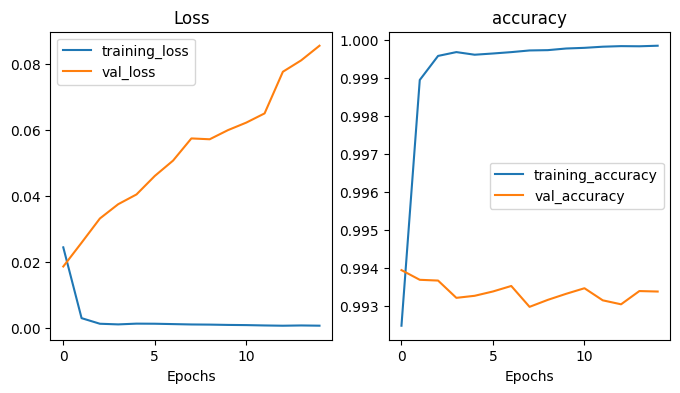

In [57]:
plot_loss_curves(history_0)

In [58]:
model_0.evaluate(test_dataset)

115/115 [==============================] - 1s 11ms/step - loss: 0.0845 - binary_accuracy: 0.9935


[0.08454015105962753, 0.9934513568878174]